In [1]:
from pathlib import Path

notebook_path = Path().cwd().parent.parent.parent.parent
import sys

sys.path.insert(0, str(notebook_path))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from explore.gcp.storage import gcp
from explore.src.utilities.eda_funcs import describe_data
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.visualisation.stats_visual import StatsVisuals
from explore.src.data.stats_dfs import StatsData

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

## Load data

In [2]:
df = gcp.read_df_from_bucket(bucket_name="processed_fbref_db", blob_name="processed_passing_types.csv")

[03/21/24 18:38:18] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=251705;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=941092;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=678382;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=747710;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [3]:
df.head()

rk               player nation    pos           squad            comp  \
0   1  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
1   2       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
3   4        Ignazio Abate    ITA     DF           Milan         Serie A   
4   5      Aymen Abdennour    TUN     DF       Marseille         Ligue 1   

    age    born   90s  passes_attempted  live_ball_passes  dead_ball_passes  \
0  26.0  1990.0  24.3            1176.0             897.0             276.0   
1  21.0  1995.0   1.5              44.0              41.0               2.0   
2  21.0  1995.0   5.7             120.0             110.0              10.0   
3  30.0  1986.0  11.7             776.0             653.0             119.0   
4  27.0  1989.0   5.5             333.0             325.0               7.0   

   free_kick_passes  through_balls  switches  crosses  throw_ins  \
0              30.0            3.0       2.0     56.0      235.0   
1               2.0            0.0       1.0      2.0        0.0   
2               4.0            0.0       0.0     10.0        4.0   
3               7.0            0.0       2.0     31.0      112.0   
4               7.0            0.0       3.0      0.0        0.0   

   corner_kicks  inswinging_corners  outswinging_corners  straight_corners  \
0          11.0                 3.0                  5.0               2.0   
1           0.0                 0.0                  0.0               0.0   
2           0.0                 0.0                  0.0               0.0   
3           0.0                 0.0                  0.0               0.0   
4           0.0                 0.0                  0.0               0.0   

   passes_completed  passes_offside  passes_blocked     season general_pos  \
0             884.0             3.0            31.0  2017-2018    Defender   
1              29.0             1.0             3.0  2017-2018  Midfielder   
2              87.0             0.0             5.0  2017-2018  Midfielder   
3             625.0             4.0            21.0  2017-2018    Defender   
4             310.0             1.0             2.0  2017-2018    Defender   

  age_range      country continent  player_id  
0     25-29  Netherlands    Europe          1  
1     20-24      England    Europe          2  
2     20-24      England    Europe          2  
3     30-34        Italy    Europe          3  
4     25-29      Tunisia    Africa          4

In [4]:
describe_data(df)

Data Types  Null Counts  Null %  Unique Values     Min  \
rk                       int64            0    0.00           2920     1.0   
age                    float64            3    0.02             29    14.0   
born                   float64            3    0.02             32  1977.0   
90s                    float64            0    0.00            381     0.0   
passes_attempted       float64           22    0.12           2258     0.0   
live_ball_passes       float64           22    0.12           2101     0.0   
dead_ball_passes       float64           22    0.12            505     0.0   
free_kick_passes       float64           22    0.12            185     0.0   
through_balls          float64           22    0.12             42     0.0   
switches               float64           22    0.12             79     0.0   
crosses                float64            3    0.02            280     0.0   
throw_ins              float64           22    0.12            374     0.0   
corner_kicks           float64           22    0.12            161     0.0   
inswinging_corners     float64           22    0.12             86     0.0   
outswinging_corners    float64           22    0.12             89     0.0   
straight_corners       float64           22    0.12             20     0.0   
passes_completed       float64           22    0.12           1951     0.0   
passes_offside         float64           22    0.12             27     0.0   
passes_blocked         float64           22    0.12             82     0.0   
player_id                int64            0    0.00           6310     1.0   

                        Max  Median     Mean  Std Dev  Outliers  Outliers %  
rk                   2920.0  1366.0  1371.01   796.36         0        0.00  
age                    42.0    25.0    25.34     4.53        19        0.10  
born                 2008.0  1995.0  1994.35     4.92        38        0.20  
90s                    38.0    11.8    13.44    10.64         0        0.00  
passes_attempted     3365.0   457.0   604.94   560.66       257        1.34  
live_ball_passes     3169.0   410.0   542.31   510.62       386        2.02  
dead_ball_passes      736.0    25.0    60.33    87.66      2048       10.71  
free_kick_passes      239.0     6.0    16.53    24.65      1548        8.10  
through_balls          70.0     0.0     1.36     2.85      1173        6.13  
switches              103.0     2.0     5.03     7.92      1622        8.48  
crosses               393.0     6.0    22.10    37.77      1899        9.93  
throw_ins             481.0     3.0    25.38    58.73      3164       16.55  
corner_kicks          216.0     0.0     6.01    17.96      4043       21.14  
inswinging_corners    108.0     0.0     2.48     7.92      4215       22.04  
outswinging_corners   104.0     0.0     2.33     7.89      4035       21.10  
straight_corners       52.0     0.0     0.09     0.77       823        4.30  
passes_completed     2919.0   339.0   475.47   465.22       439        2.30  
passes_offside         39.0     1.0     2.30     2.79      1088        5.69  
passes_blocked         90.0     7.0    11.31    12.26       675        3.53  
player_id            6310.0  2286.0  2525.68  1641.27         0        0.00

## Clean data

## Statistical Plots

In [5]:
stat_plots = StatisticPlots(df)

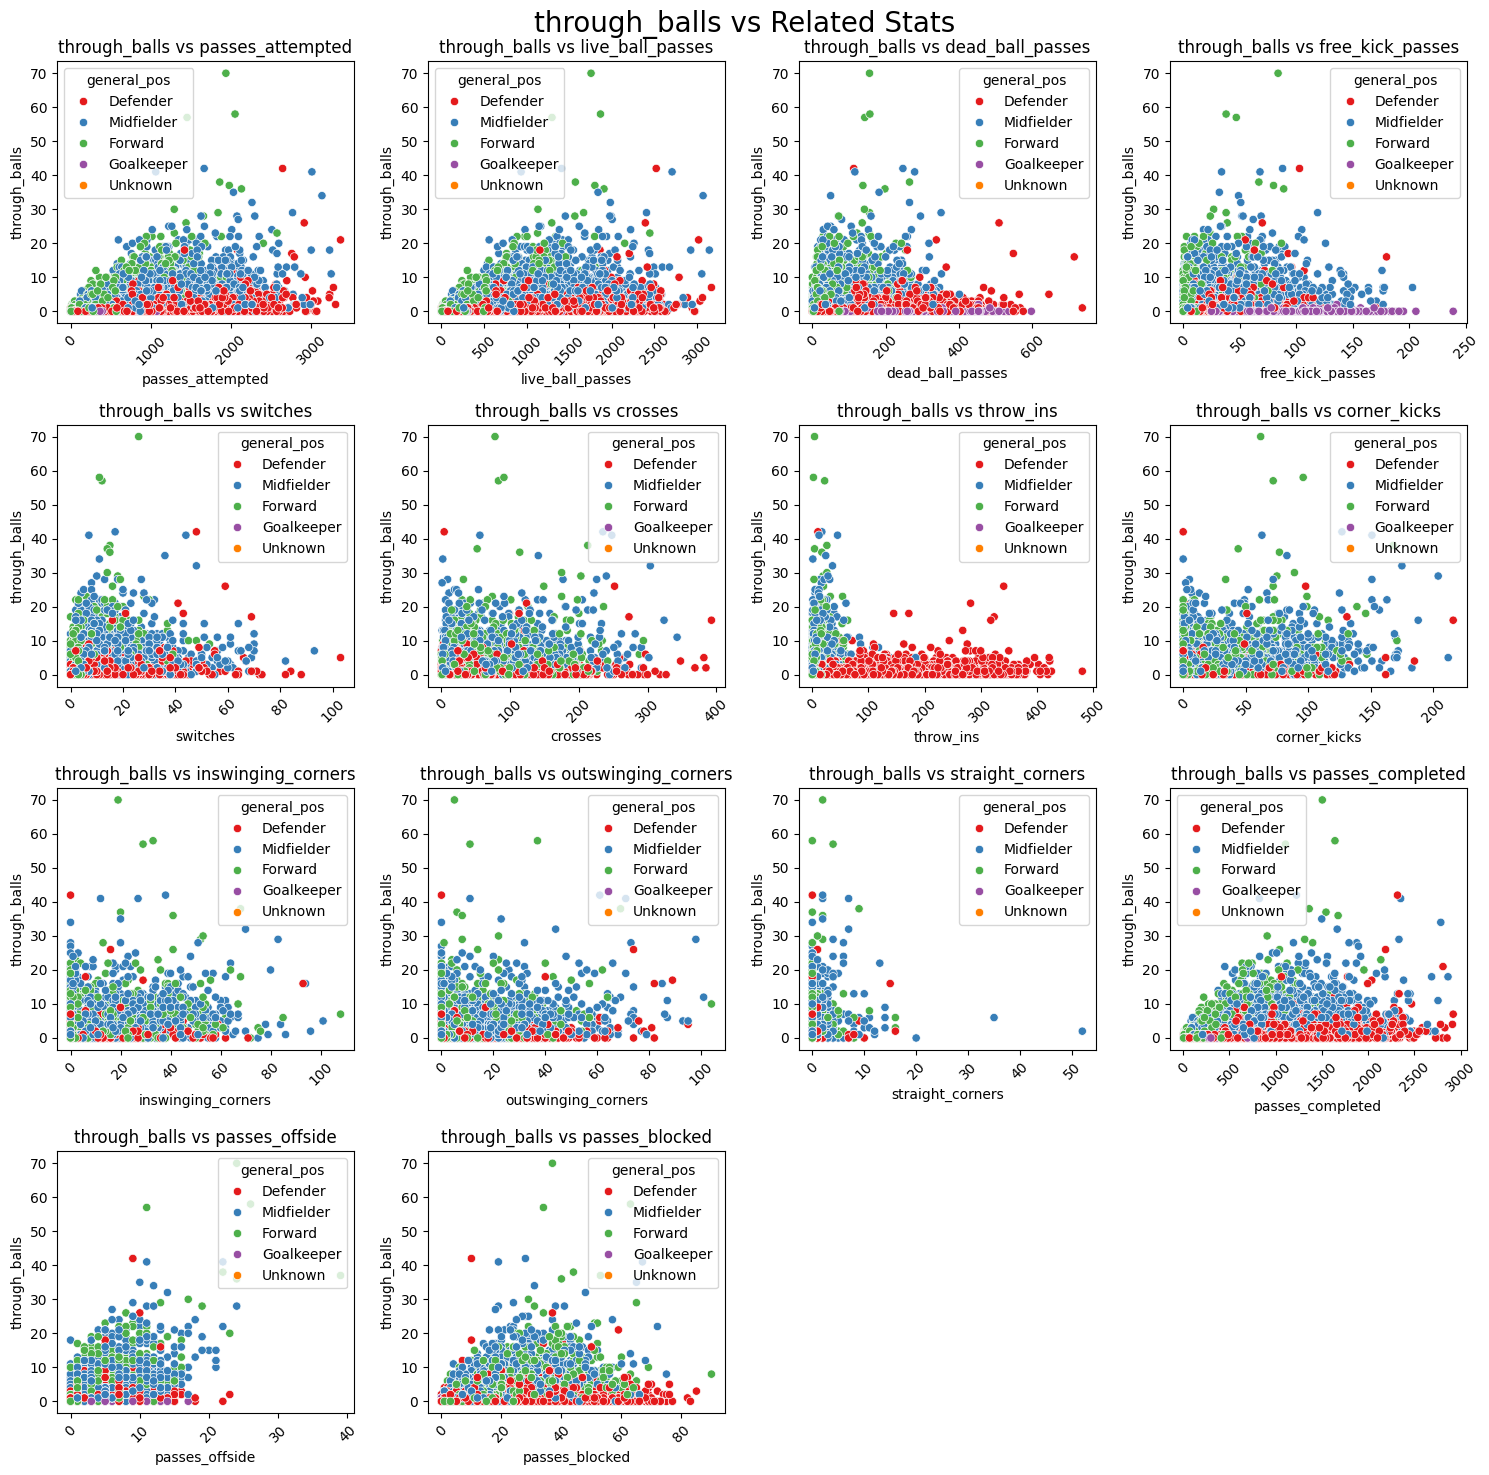

In [6]:
cols = df.columns[9:-6]

# relationship between the through balls and different pass types
stat_plots.relationships(y='through_balls', X=cols, hue='general_pos', palette='Set1')

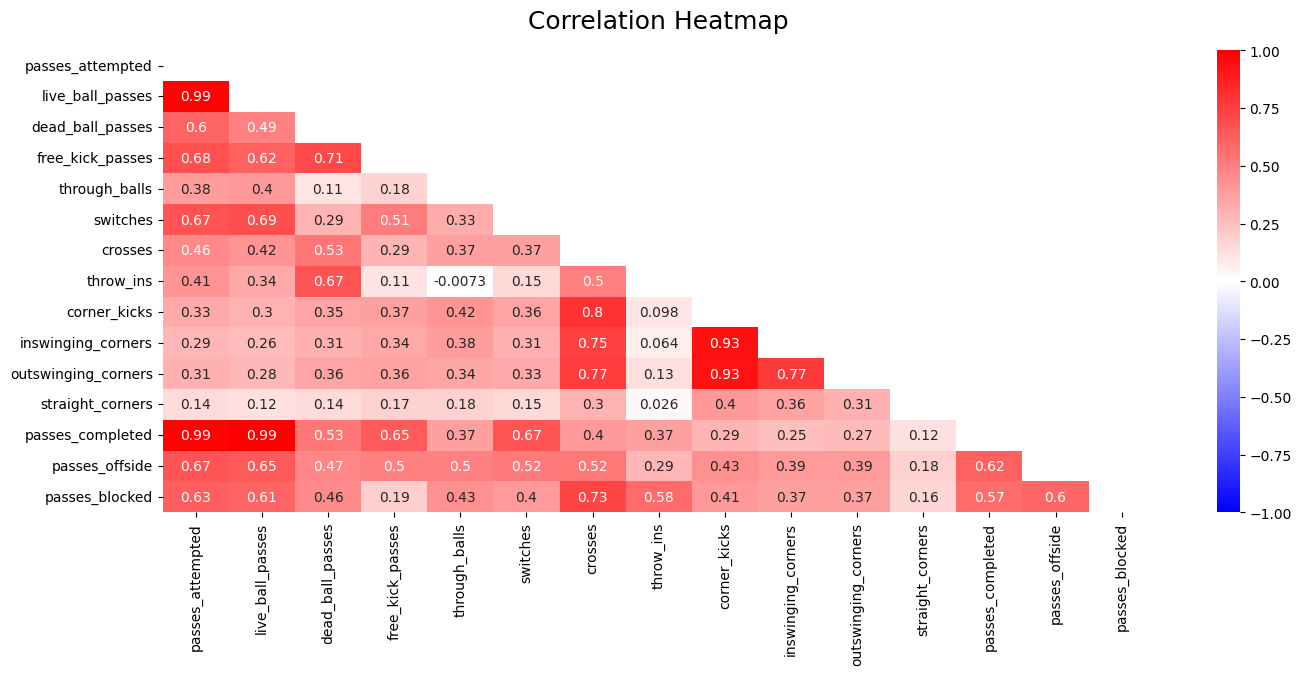

In [7]:
stat_plots.correlation_matrix(cols)

- Would be interesting to see which passes are correlated with assists

## Investigation

In [8]:
df.head()

rk               player nation    pos           squad            comp  \
0   1  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
1   2       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
3   4        Ignazio Abate    ITA     DF           Milan         Serie A   
4   5      Aymen Abdennour    TUN     DF       Marseille         Ligue 1   

    age    born   90s  passes_attempted  live_ball_passes  dead_ball_passes  \
0  26.0  1990.0  24.3            1176.0             897.0             276.0   
1  21.0  1995.0   1.5              44.0              41.0               2.0   
2  21.0  1995.0   5.7             120.0             110.0              10.0   
3  30.0  1986.0  11.7             776.0             653.0             119.0   
4  27.0  1989.0   5.5             333.0             325.0               7.0   

   free_kick_passes  through_balls  switches  crosses  throw_ins  \
0              30.0            3.0       2.0     56.0      235.0   
1               2.0            0.0       1.0      2.0        0.0   
2               4.0            0.0       0.0     10.0        4.0   
3               7.0            0.0       2.0     31.0      112.0   
4               7.0            0.0       3.0      0.0        0.0   

   corner_kicks  inswinging_corners  outswinging_corners  straight_corners  \
0          11.0                 3.0                  5.0               2.0   
1           0.0                 0.0                  0.0               0.0   
2           0.0                 0.0                  0.0               0.0   
3           0.0                 0.0                  0.0               0.0   
4           0.0                 0.0                  0.0               0.0   

   passes_completed  passes_offside  passes_blocked     season general_pos  \
0             884.0             3.0            31.0  2017-2018    Defender   
1              29.0             1.0             3.0  2017-2018  Midfielder   
2              87.0             0.0             5.0  2017-2018  Midfielder   
3             625.0             4.0            21.0  2017-2018    Defender   
4             310.0             1.0             2.0  2017-2018    Defender   

  age_range      country continent  player_id  
0     25-29  Netherlands    Europe          1  
1     20-24      England    Europe          2  
2     20-24      England    Europe          2  
3     30-34        Italy    Europe          3  
4     25-29      Tunisia    Africa          4

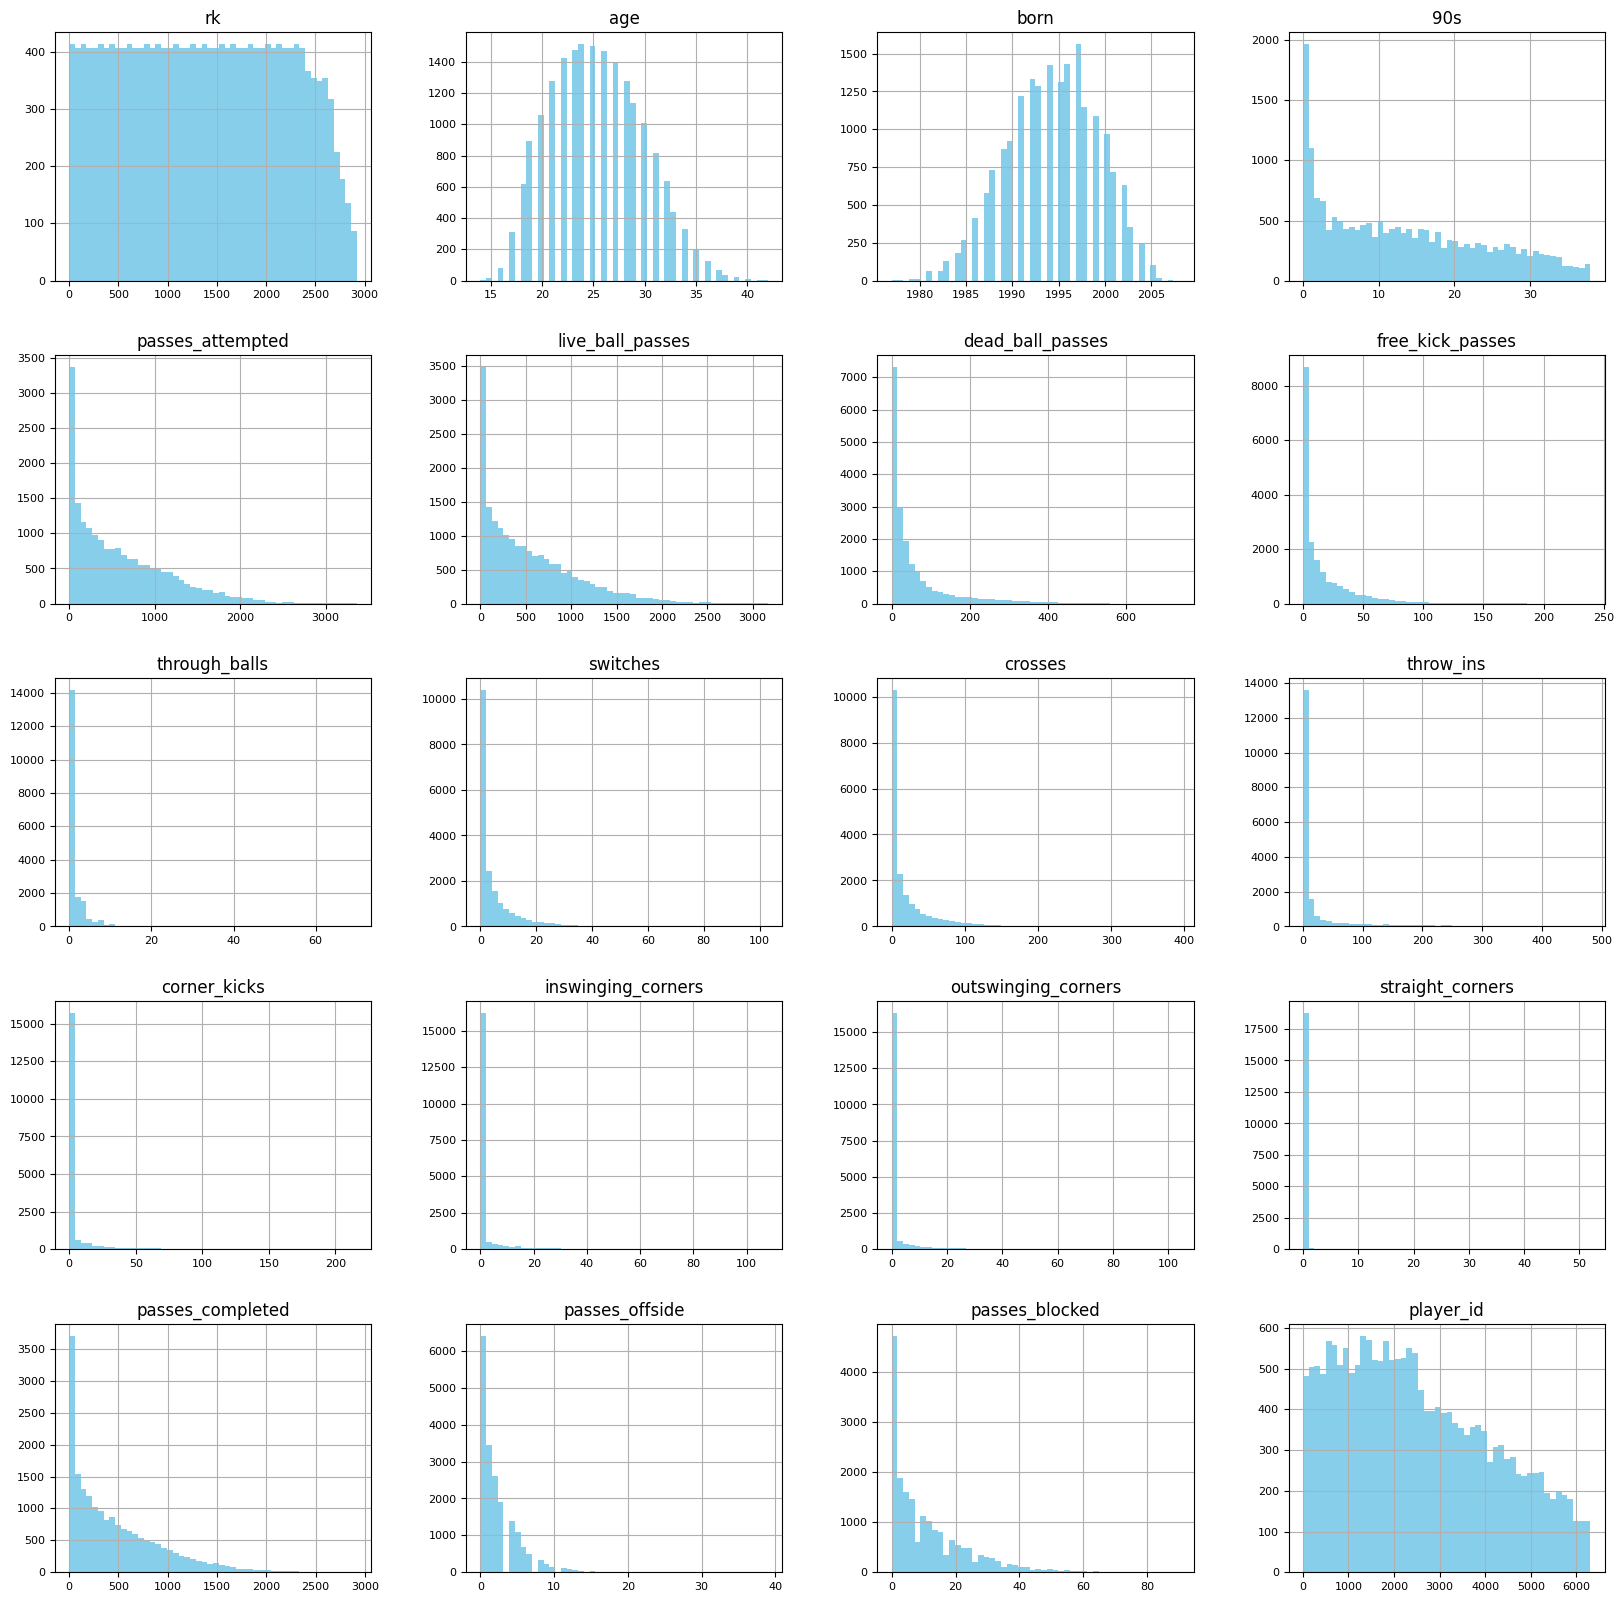

In [9]:
# distribution of pass types
df.hist(figsize=(20, 20), bins=50, color='skyblue', xlabelsize=8, ylabelsize=8)
plt.show()

In [10]:
len(cols)

15

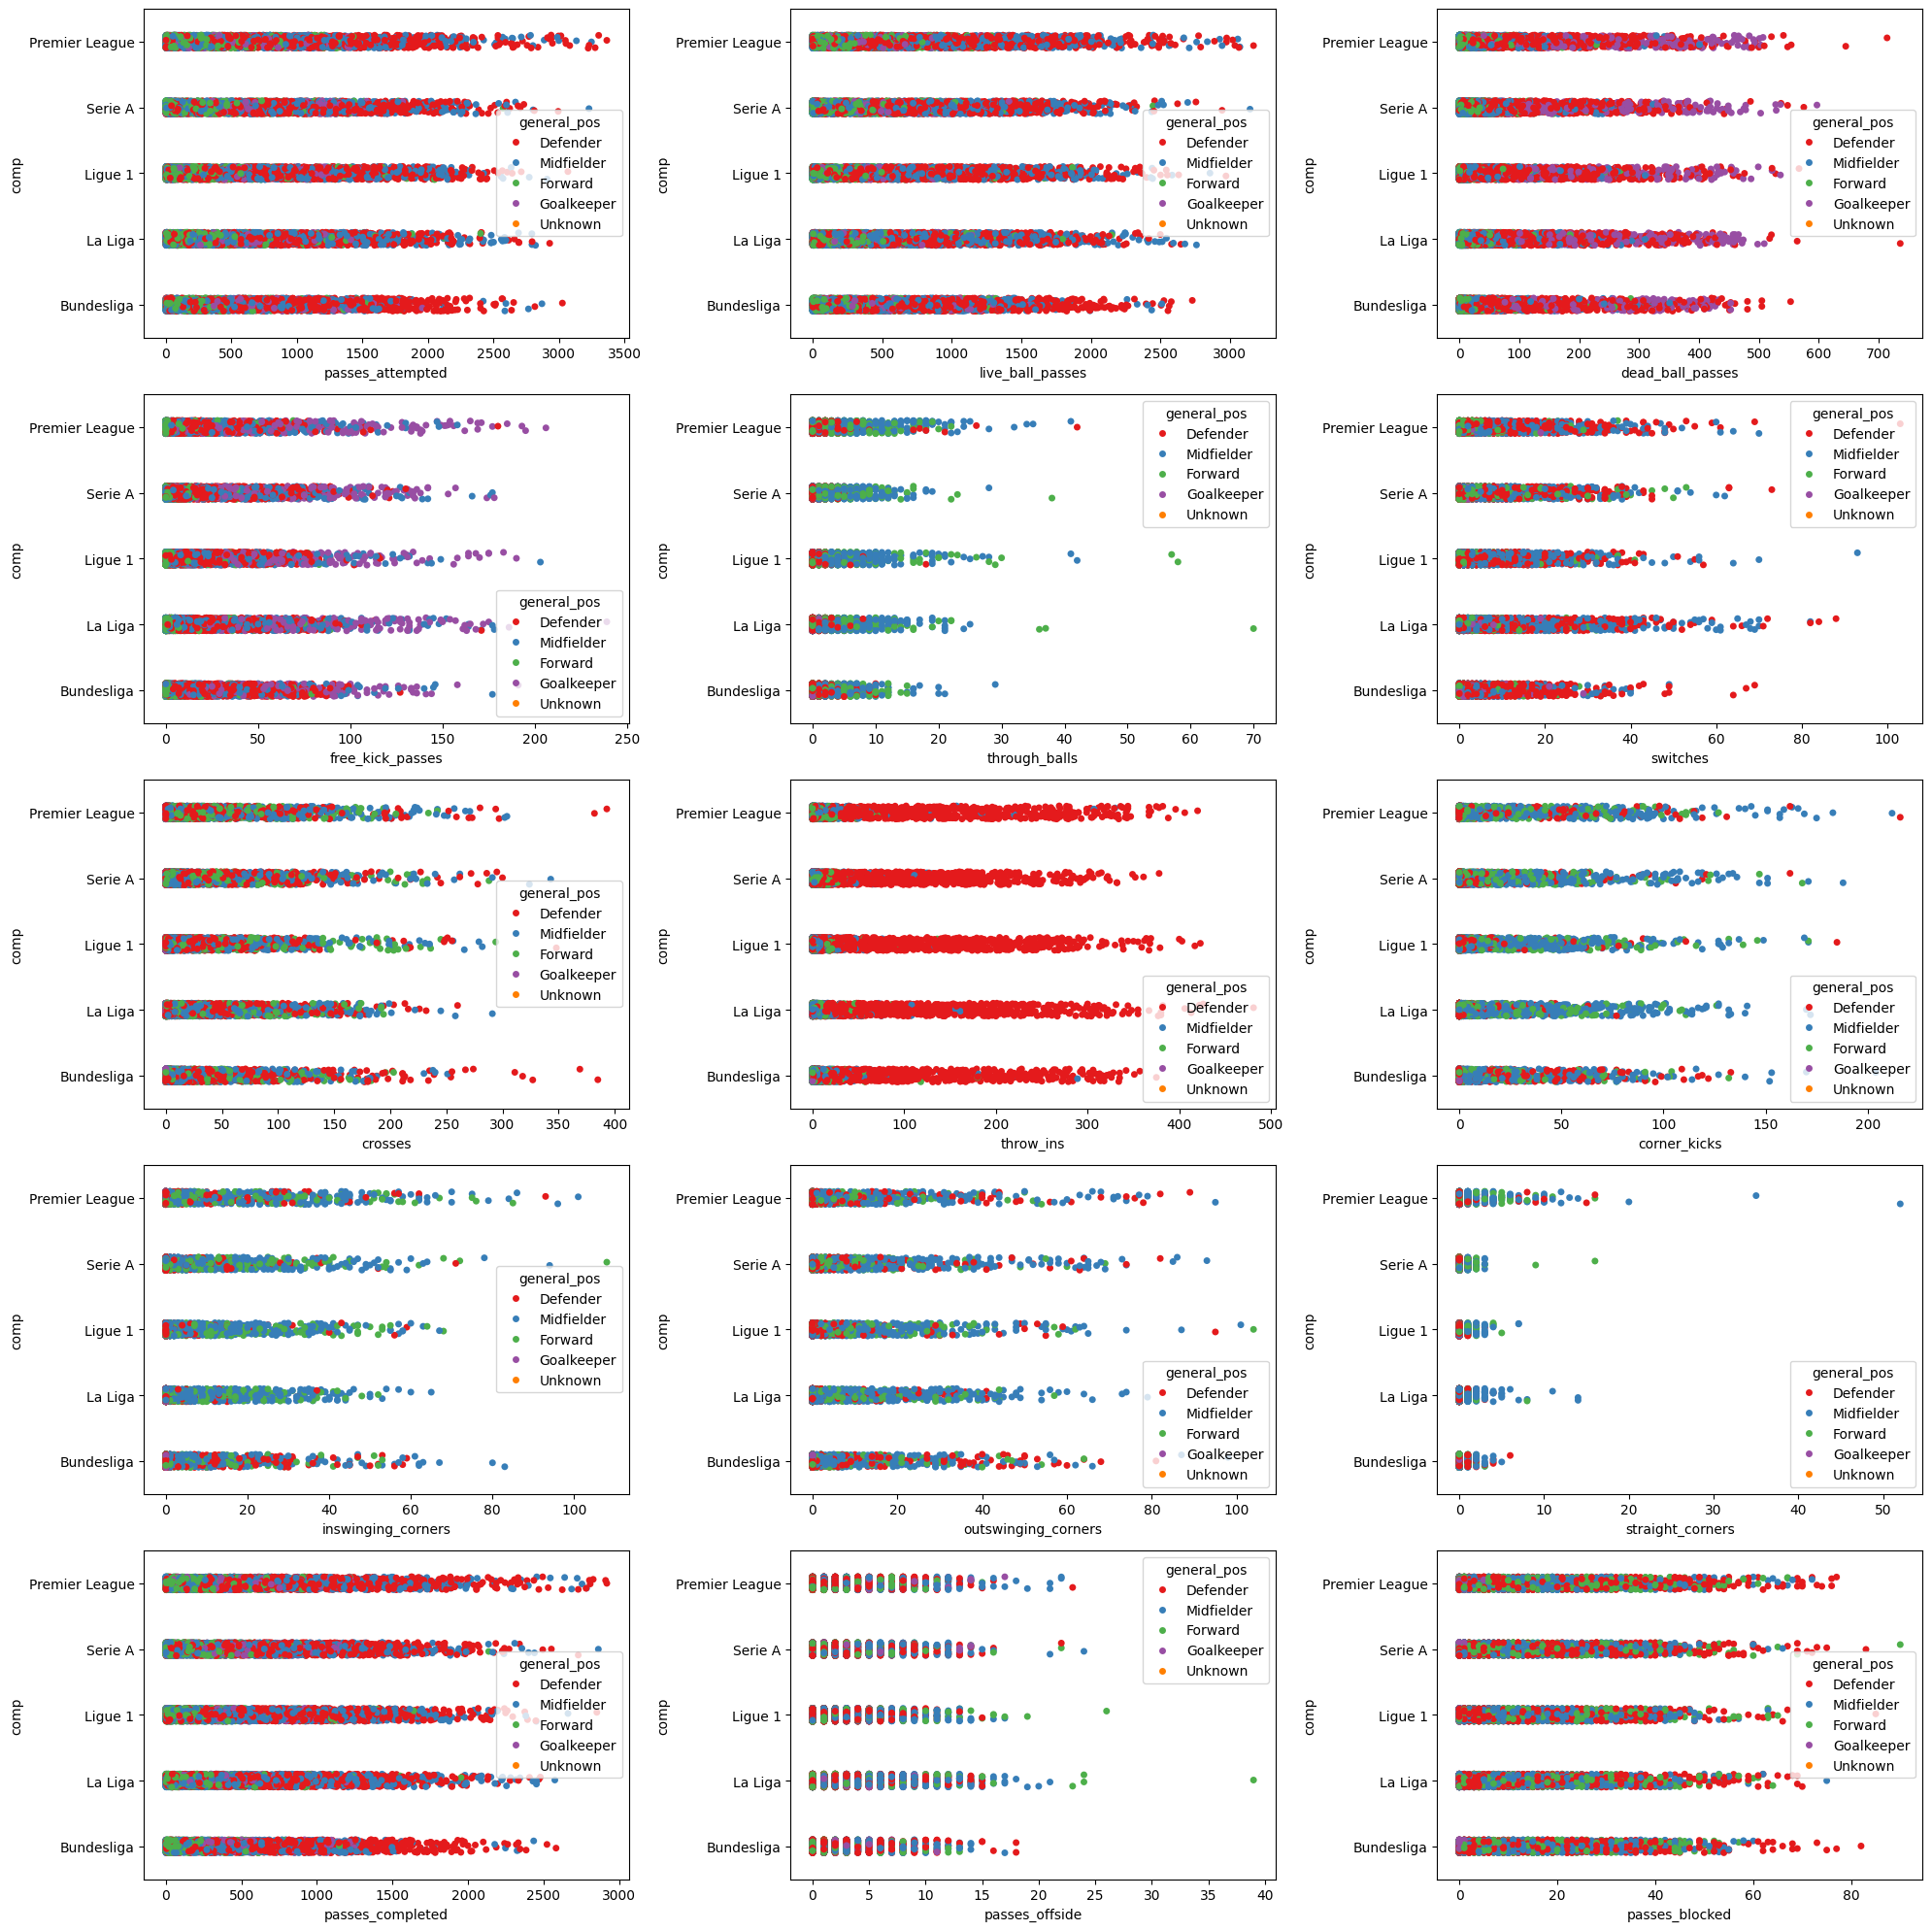

In [11]:
fig, axes = plt.subplots(figsize=(20, 20), nrows=5, ncols=3)

for col, ax in zip(cols, axes.flatten()):
    sns.stripplot(y="comp", x=col, data=df, palette='Set1', hue='general_pos', ax=ax)
    
plt.tight_layout()

In [12]:
df.head()

rk               player nation    pos           squad            comp  \
0   1  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
1   2       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
3   4        Ignazio Abate    ITA     DF           Milan         Serie A   
4   5      Aymen Abdennour    TUN     DF       Marseille         Ligue 1   

    age    born   90s  passes_attempted  live_ball_passes  dead_ball_passes  \
0  26.0  1990.0  24.3            1176.0             897.0             276.0   
1  21.0  1995.0   1.5              44.0              41.0               2.0   
2  21.0  1995.0   5.7             120.0             110.0              10.0   
3  30.0  1986.0  11.7             776.0             653.0             119.0   
4  27.0  1989.0   5.5             333.0             325.0               7.0   

   free_kick_passes  through_balls  switches  crosses  throw_ins  \
0              30.0            3.0       2.0     56.0      235.0   
1               2.0            0.0       1.0      2.0        0.0   
2               4.0            0.0       0.0     10.0        4.0   
3               7.0            0.0       2.0     31.0      112.0   
4               7.0            0.0       3.0      0.0        0.0   

   corner_kicks  inswinging_corners  outswinging_corners  straight_corners  \
0          11.0                 3.0                  5.0               2.0   
1           0.0                 0.0                  0.0               0.0   
2           0.0                 0.0                  0.0               0.0   
3           0.0                 0.0                  0.0               0.0   
4           0.0                 0.0                  0.0               0.0   

   passes_completed  passes_offside  passes_blocked     season general_pos  \
0             884.0             3.0            31.0  2017-2018    Defender   
1              29.0             1.0             3.0  2017-2018  Midfielder   
2              87.0             0.0             5.0  2017-2018  Midfielder   
3             625.0             4.0            21.0  2017-2018    Defender   
4             310.0             1.0             2.0  2017-2018    Defender   

  age_range      country continent  player_id  
0     25-29  Netherlands    Europe          1  
1     20-24      England    Europe          2  
2     20-24      England    Europe          2  
3     30-34        Italy    Europe          3  
4     25-29      Tunisia    Africa          4

In [13]:
pass_plots = StatsVisuals(df)

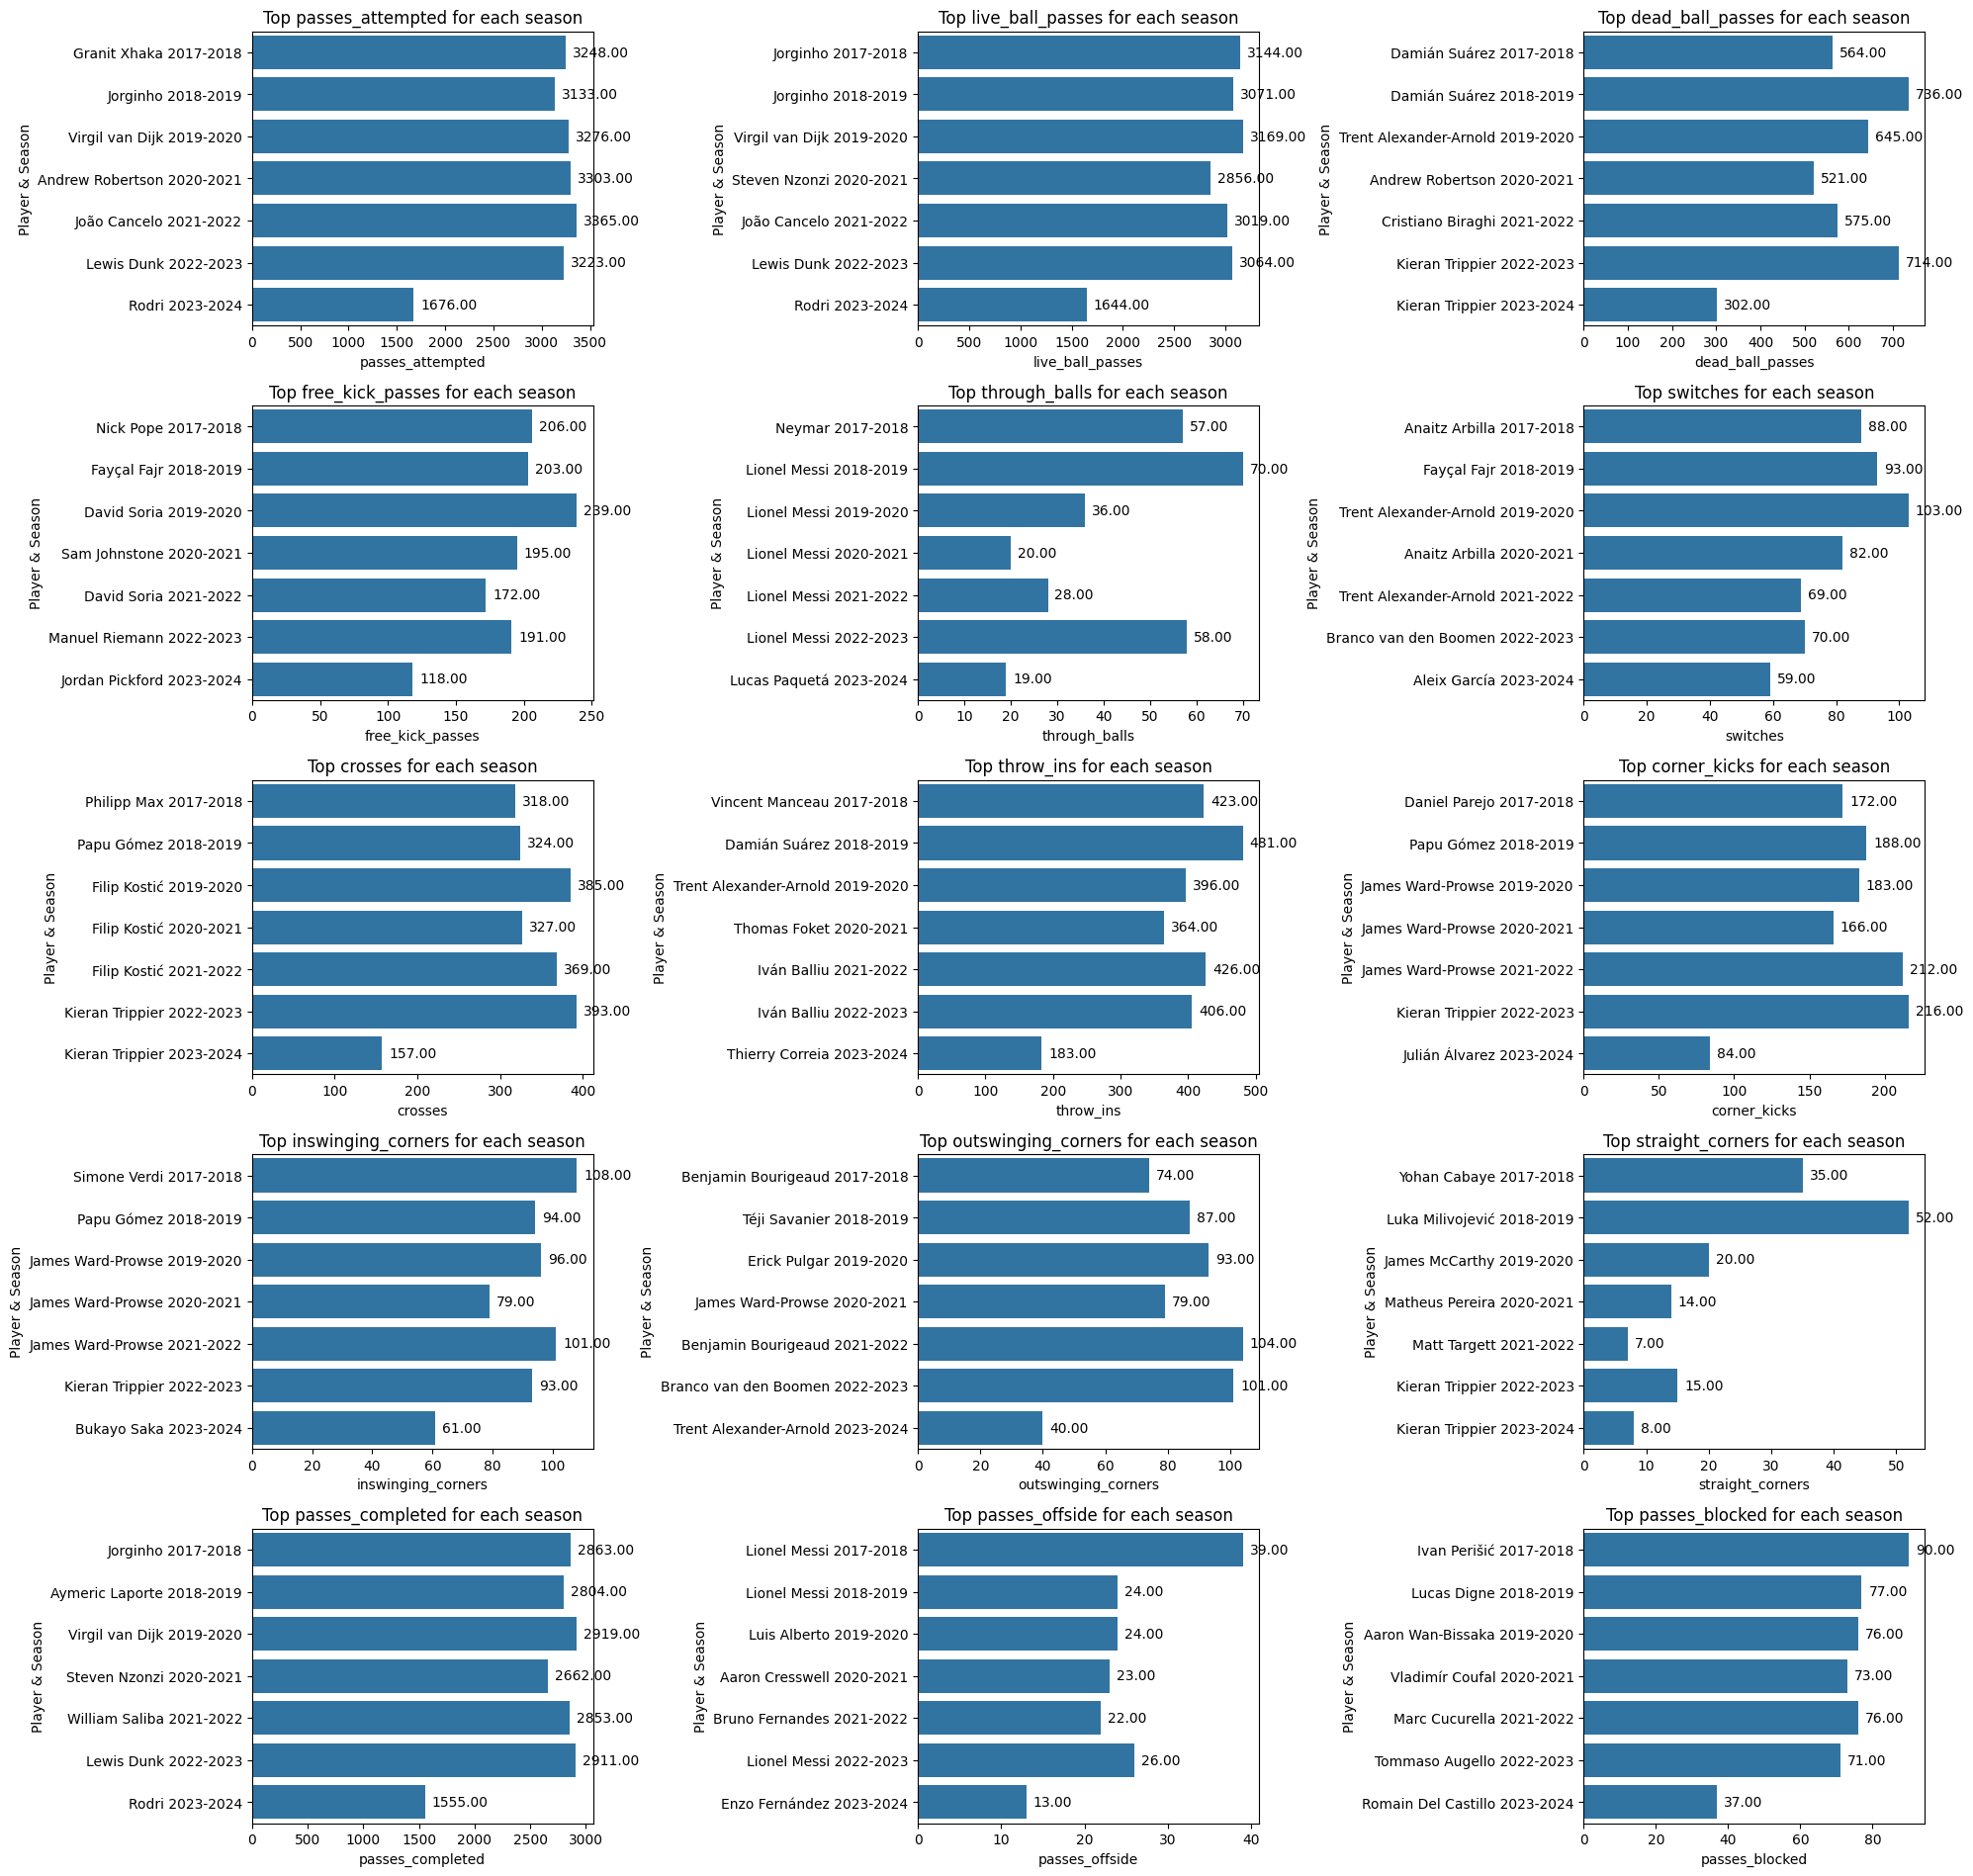

In [14]:
pass_plots.top_per_season(columns=cols)

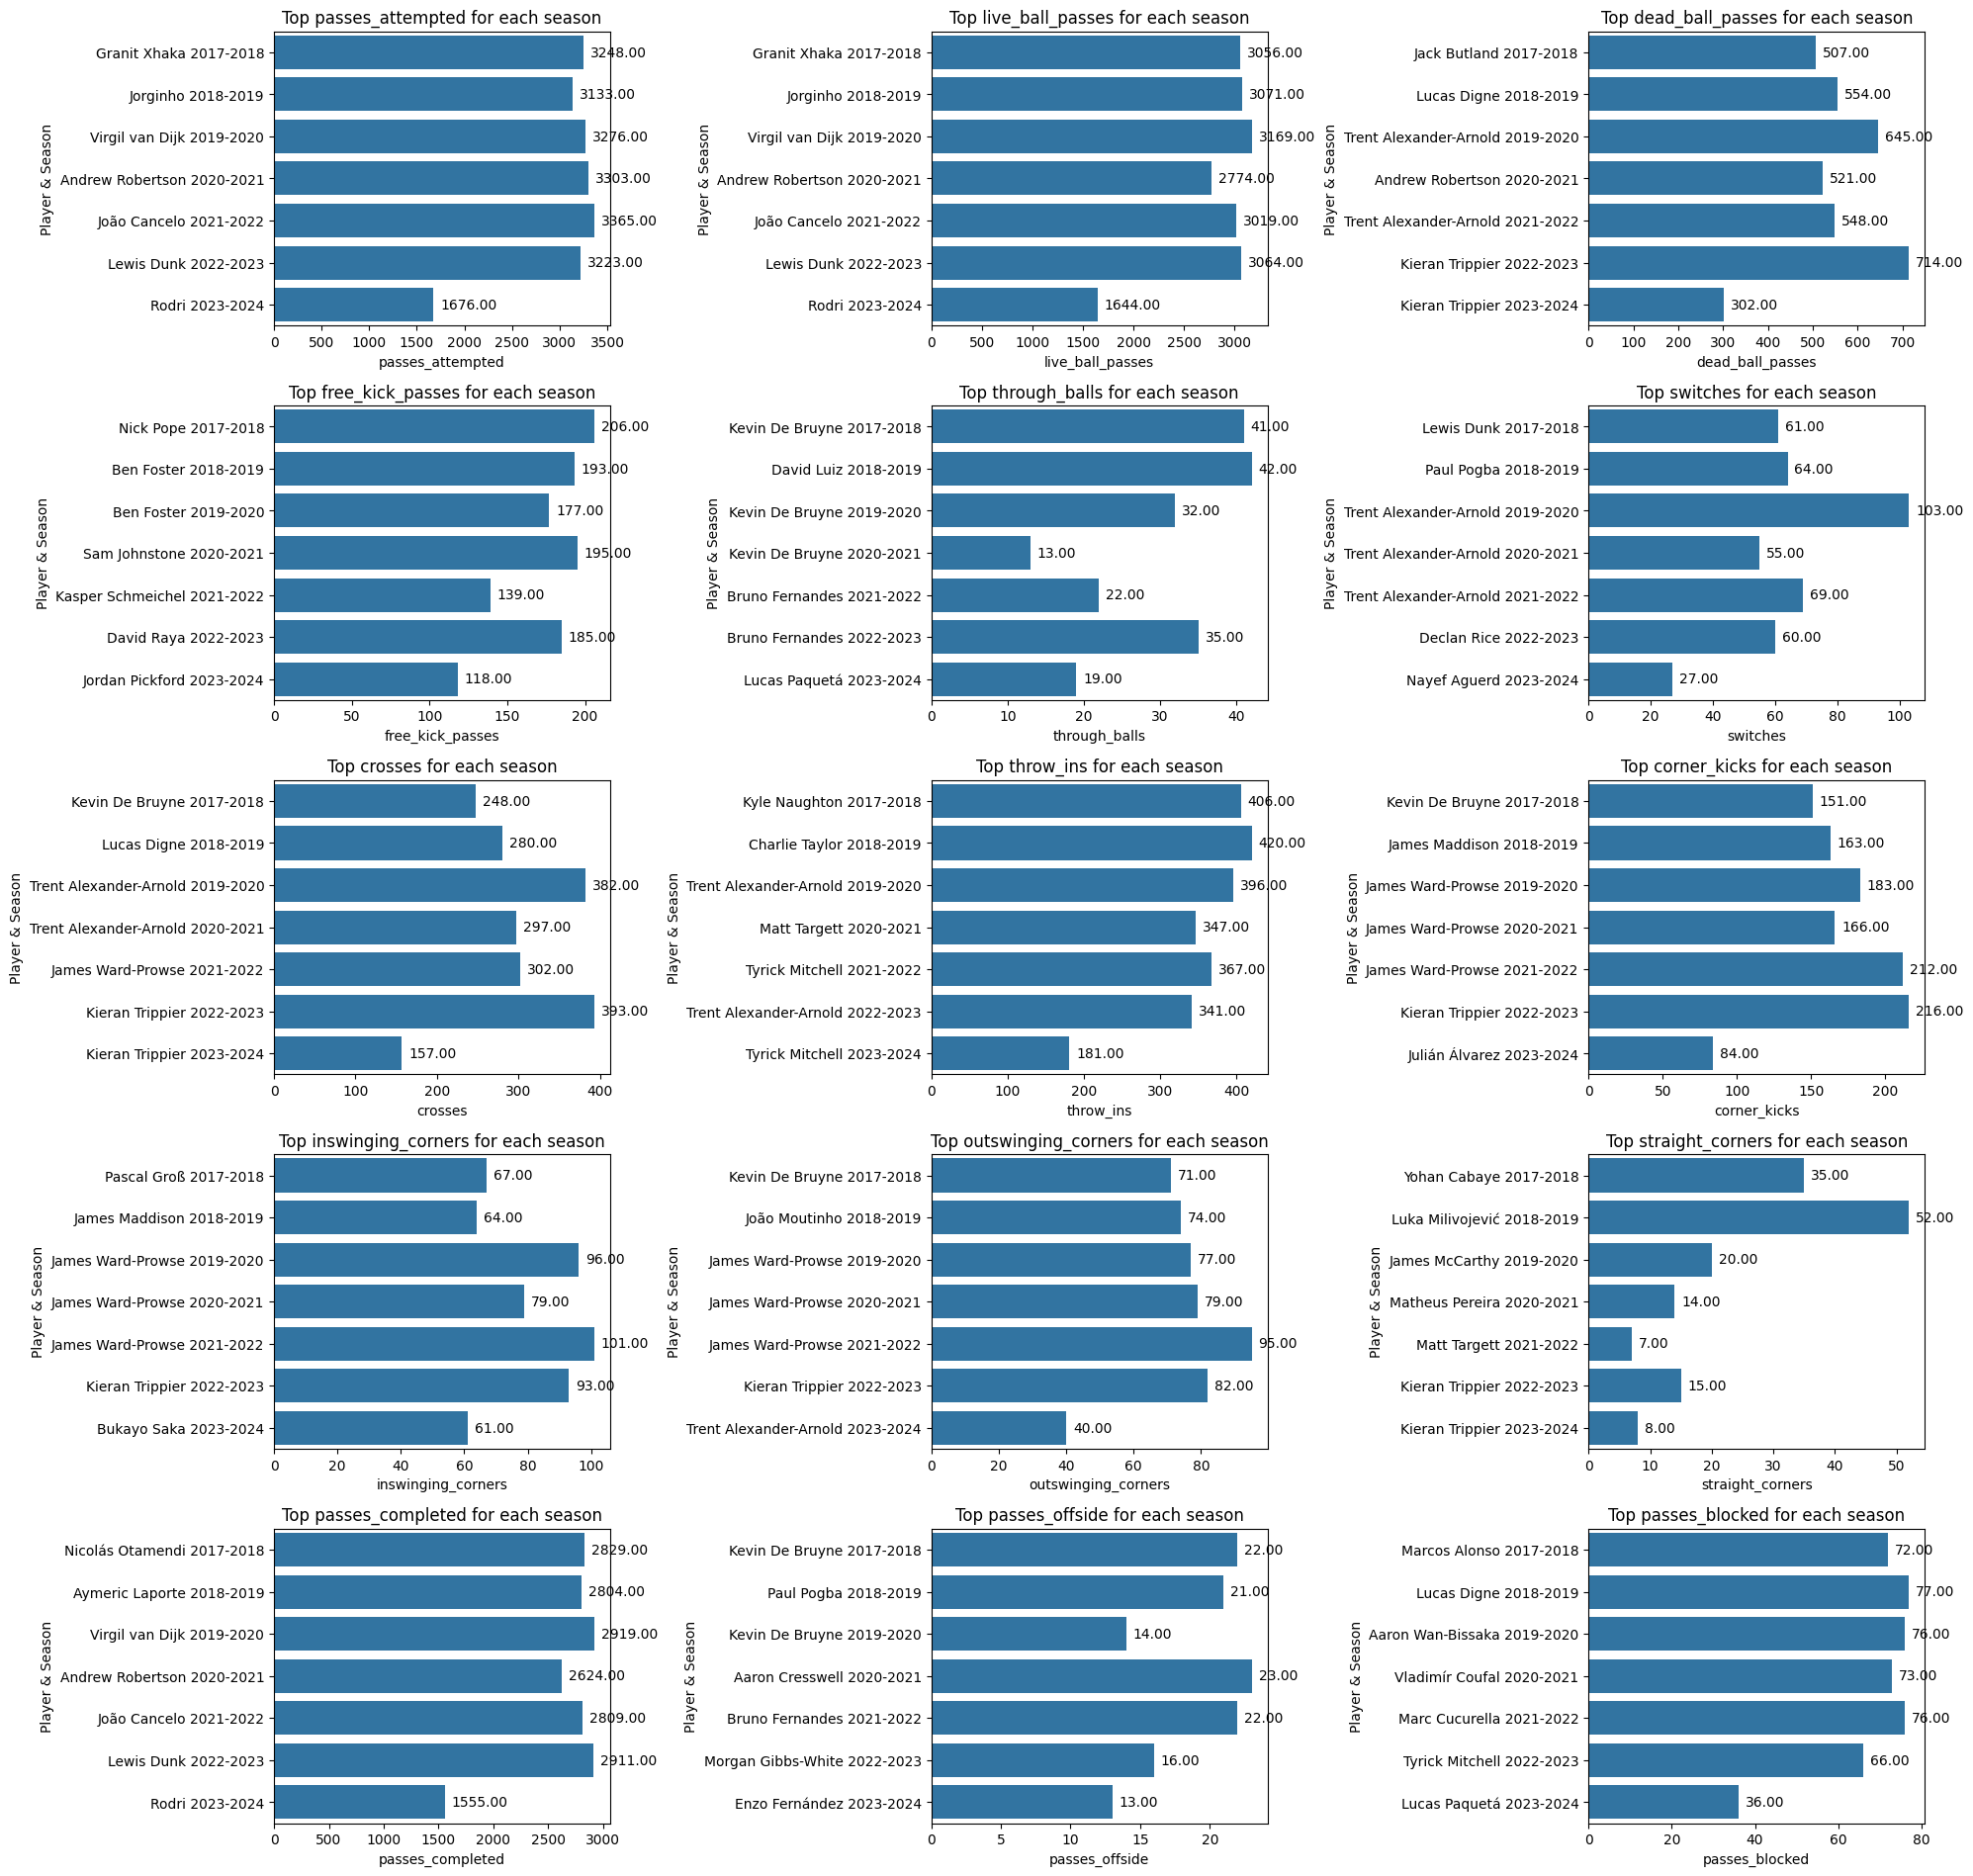

In [15]:
pass_plots.top_per_season(columns=cols, league='Premier League')

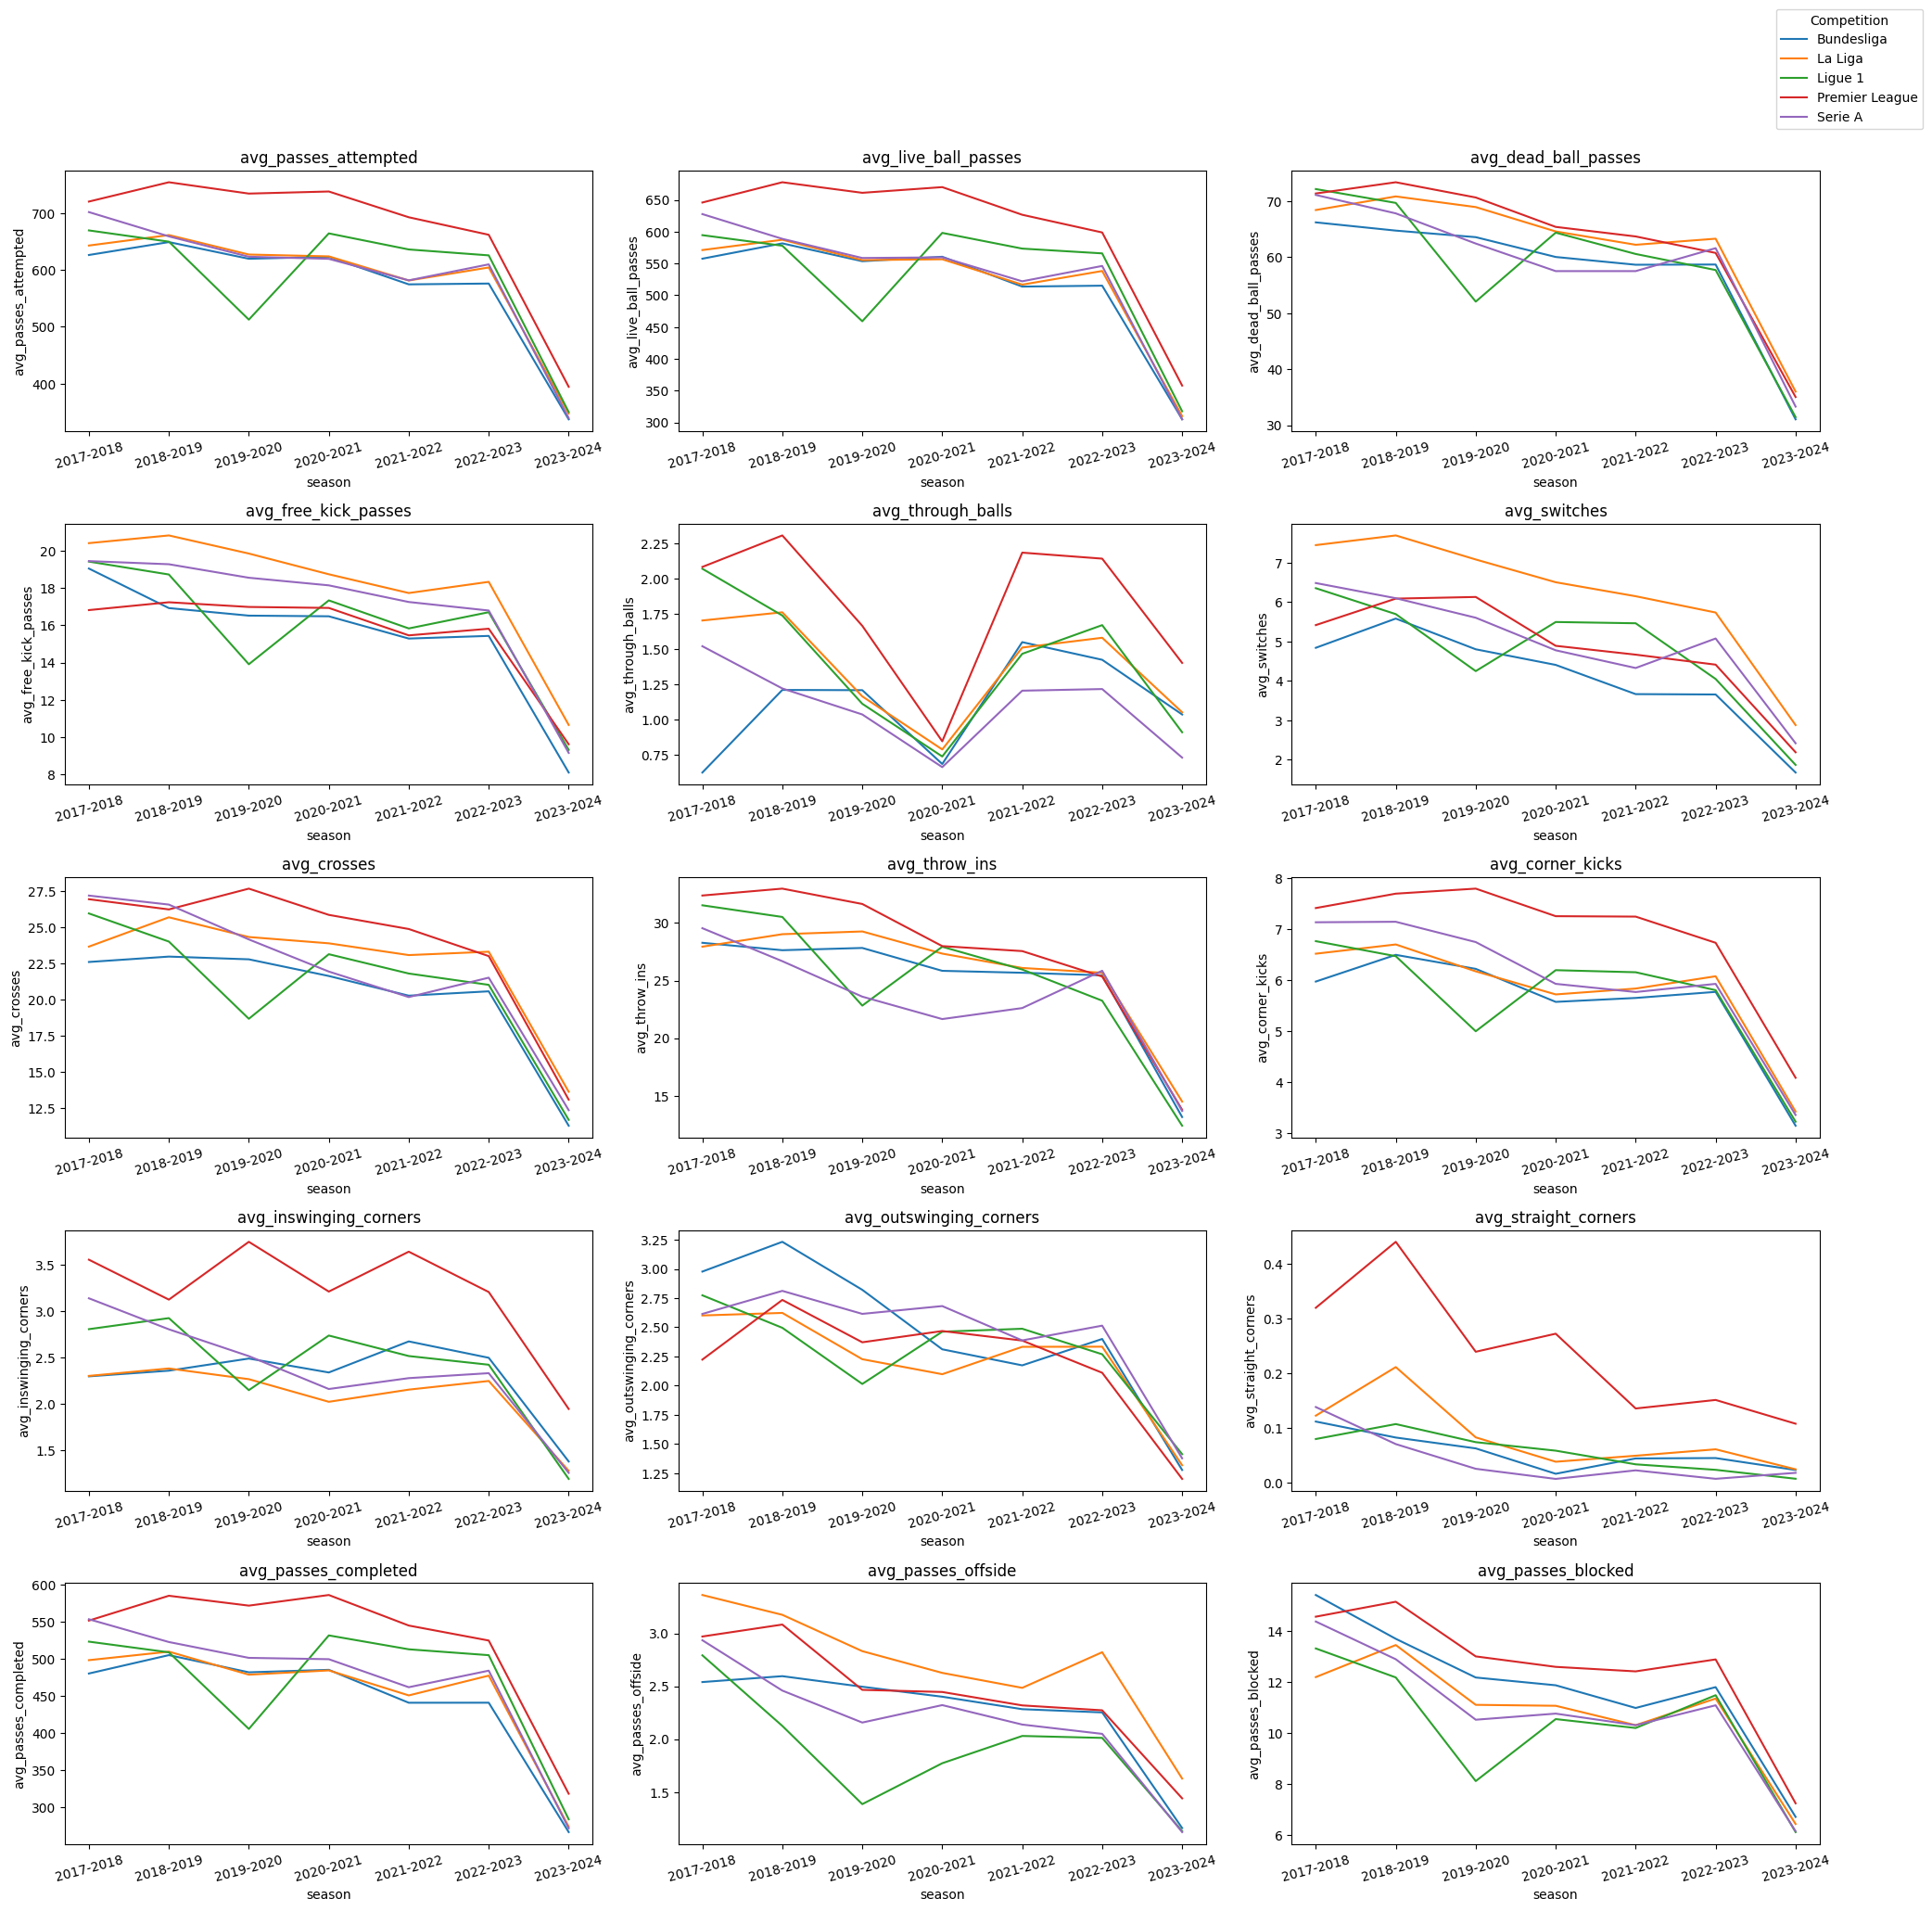

In [16]:
pass_plots.avgs_time_series(groupby='comp', columns=cols)

In [17]:
df.head()

rk               player nation    pos           squad            comp  \
0   1  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
1   2       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
3   4        Ignazio Abate    ITA     DF           Milan         Serie A   
4   5      Aymen Abdennour    TUN     DF       Marseille         Ligue 1   

    age    born   90s  passes_attempted  live_ball_passes  dead_ball_passes  \
0  26.0  1990.0  24.3            1176.0             897.0             276.0   
1  21.0  1995.0   1.5              44.0              41.0               2.0   
2  21.0  1995.0   5.7             120.0             110.0              10.0   
3  30.0  1986.0  11.7             776.0             653.0             119.0   
4  27.0  1989.0   5.5             333.0             325.0               7.0   

   free_kick_passes  through_balls  switches  crosses  throw_ins  \
0              30.0            3.0       2.0     56.0      235.0   
1               2.0            0.0       1.0      2.0        0.0   
2               4.0            0.0       0.0     10.0        4.0   
3               7.0            0.0       2.0     31.0      112.0   
4               7.0            0.0       3.0      0.0        0.0   

   corner_kicks  inswinging_corners  outswinging_corners  straight_corners  \
0          11.0                 3.0                  5.0               2.0   
1           0.0                 0.0                  0.0               0.0   
2           0.0                 0.0                  0.0               0.0   
3           0.0                 0.0                  0.0               0.0   
4           0.0                 0.0                  0.0               0.0   

   passes_completed  passes_offside  passes_blocked     season general_pos  \
0             884.0             3.0            31.0  2017-2018    Defender   
1              29.0             1.0             3.0  2017-2018  Midfielder   
2              87.0             0.0             5.0  2017-2018  Midfielder   
3             625.0             4.0            21.0  2017-2018    Defender   
4             310.0             1.0             2.0  2017-2018    Defender   

  age_range      country continent  player_id  
0     25-29  Netherlands    Europe          1  
1     20-24      England    Europe          2  
2     20-24      England    Europe          2  
3     30-34        Italy    Europe          3  
4     25-29      Tunisia    Africa          4

In [18]:
df['country'].value_counts().index[:10]

Index(['Spain', 'France', 'Italy', 'Germany', 'England', 'Brazil', 'Argentina',
       'Netherlands', 'Portugal', 'Senegal'],
      dtype='object', name='country')

In [19]:
# which countries had the most minutes
mins_played = df.groupby('country')['90s'].sum().sort_values(ascending=False).head(10)
countries = mins_played.index[:10].tolist()

In [20]:
top_countries_df = df.loc[df['country'].isin(countries)]

In [21]:
# get players that have played more than 10 90s
top_countries_df = top_countries_df.loc[top_countries_df['90s'] > 10]

In [22]:
countries_avgs_df = StatsData(top_countries_df).avgs_df(groupby='country', columns=cols)

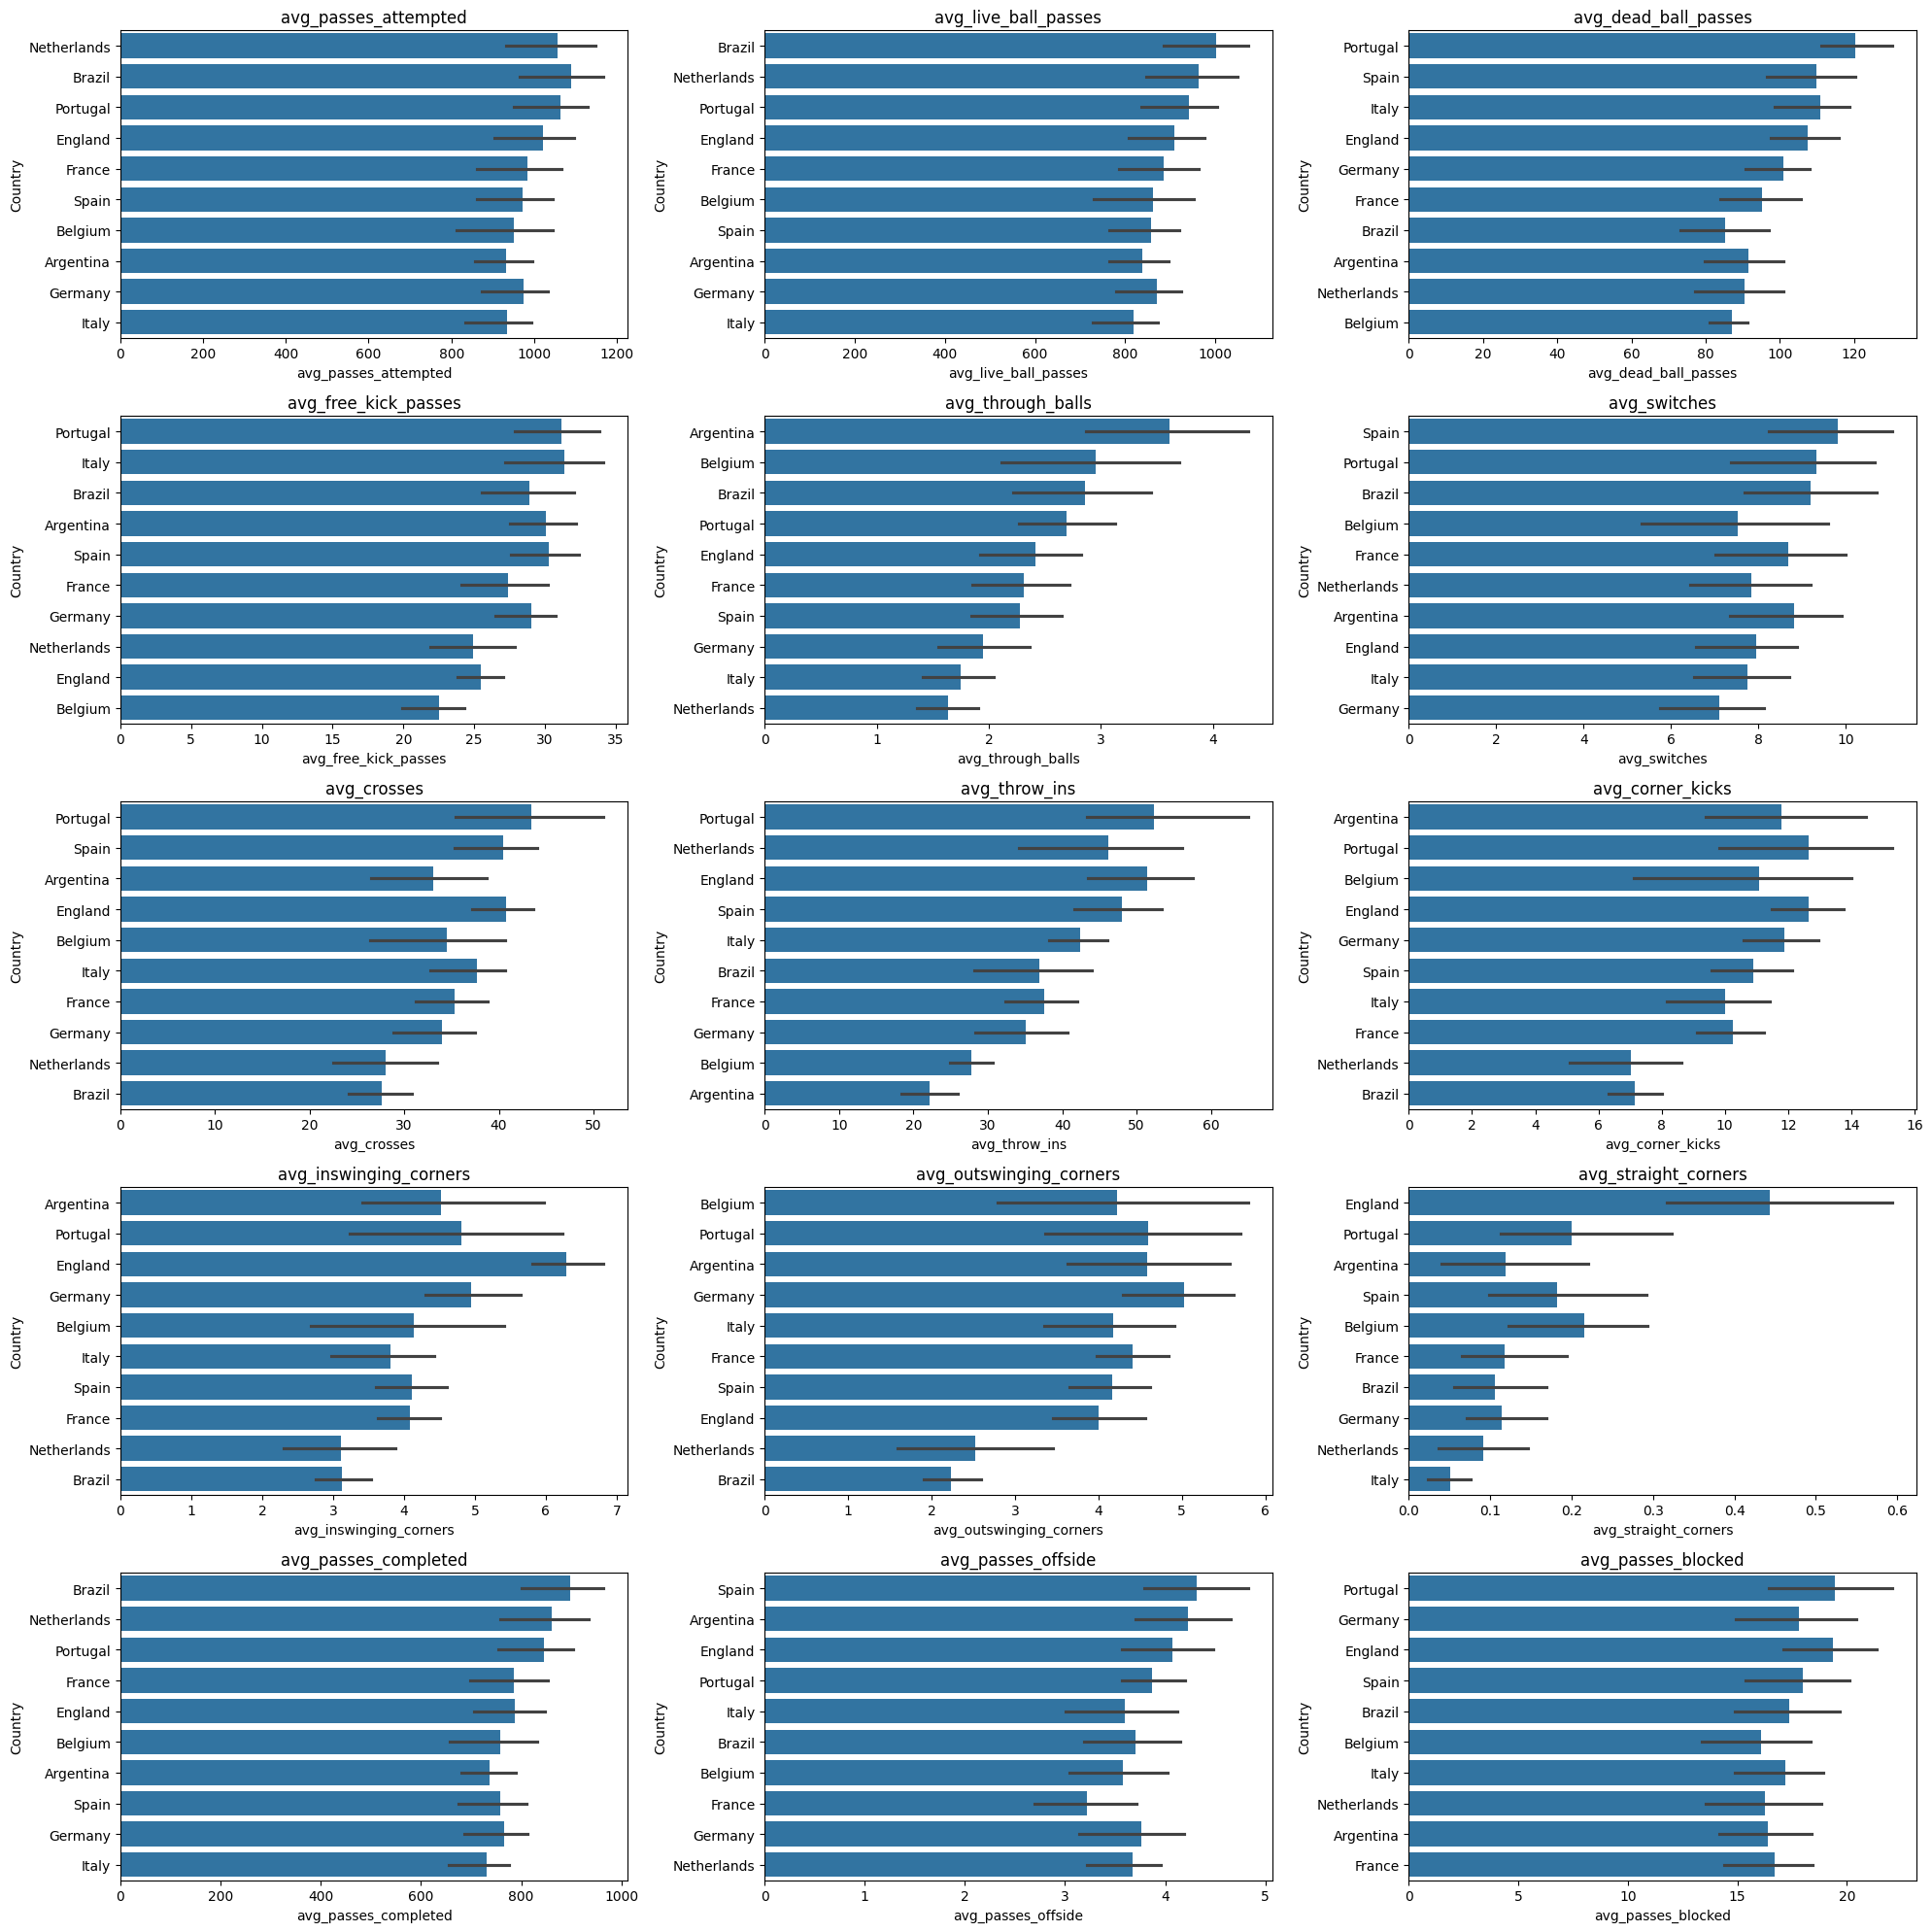

In [23]:
cols = countries_avgs_df.columns[2:]

fig, axes = plt.subplots(figsize=(20, 20), nrows=5, ncols=3)

for col, ax in zip(cols, axes.flatten()):
    sns.barplot(y='country', x=col, data=countries_avgs_df.sort_values(col, ascending=False), ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Country')

# sns.barplot(y='country', x='avg_through_balls', data=countries_avgs_df)
plt.tight_layout()